In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)  # Add the project root to Python path

# Import reusable scripts
from scripts.data_loader import load_data  # Load dataset
from scripts.eda import summarize_data, plot_distributions, plot_categorical_distributions, plot_correlation_heatmap, plot_numeric_distributions  # EDA functions
from scripts.preprocessing import fill_missing_values  # Handle missing values
from scripts.feature_engineering import extract_title, create_family_size  # Feature engineering


Reload modules if any change was applied
```
import importlib

import scripts.eda  # Ensure the module is recognized
importlib.reload(scripts.eda)  # Force reload
```
Now, import the updated functions

```from scripts.eda import summarize_data, plot_distributions```


In [3]:
# 📌 Step 1: Load Data
df = load_data()  # Ensure correct path

# 📌 Step 2: Dataset Overview - Checking Missing Values
summarize_data(df)  # Uses script function

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

📌 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687


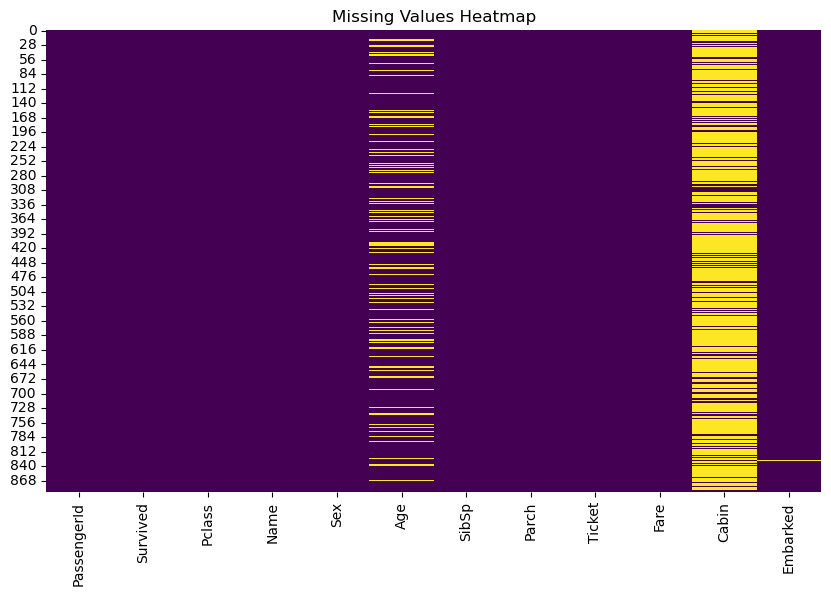

In [4]:
# Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [36]:
# 📌 Step 3: Add new features into Dataframe
df = extract_title(df)
df = create_family_size(df)

<Figure size 1500x1000 with 0 Axes>

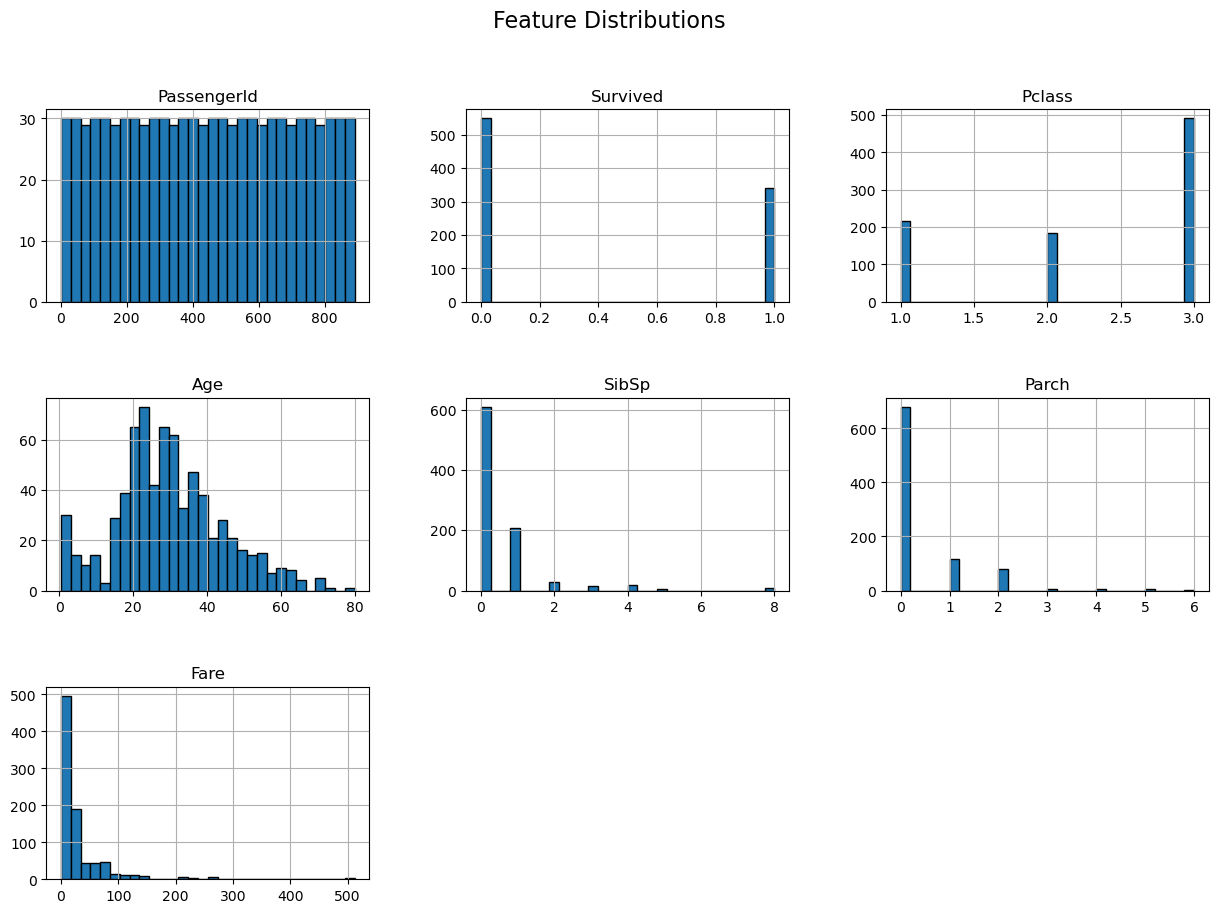

In [5]:
# 📌 Step 3: Numeric Feature Distributions
plot_distributions(df, layout="single")

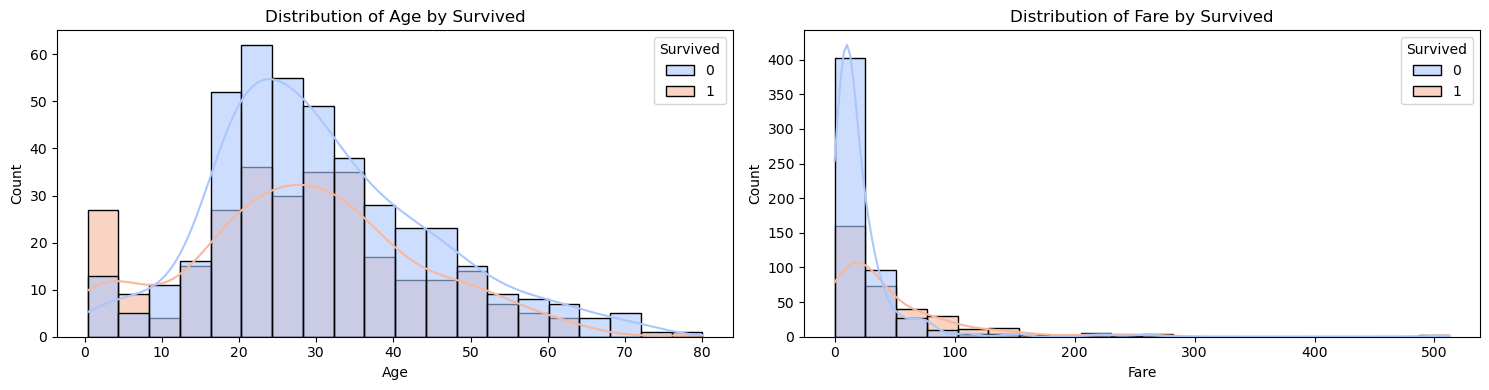

In [34]:
plot_numeric_distributions(df, layout="single", selected_columns=["Age", "Fare"], hue_feature="Survived", bins=20)

In [31]:
import importlib

import scripts.eda  # Ensure the module is recognized
importlib.reload(scripts.eda)  # Force reload

from scripts.eda import summarize_data, plot_distributions, plot_categorical_distributions, plot_correlation_heatmap, plot_numeric_distributions


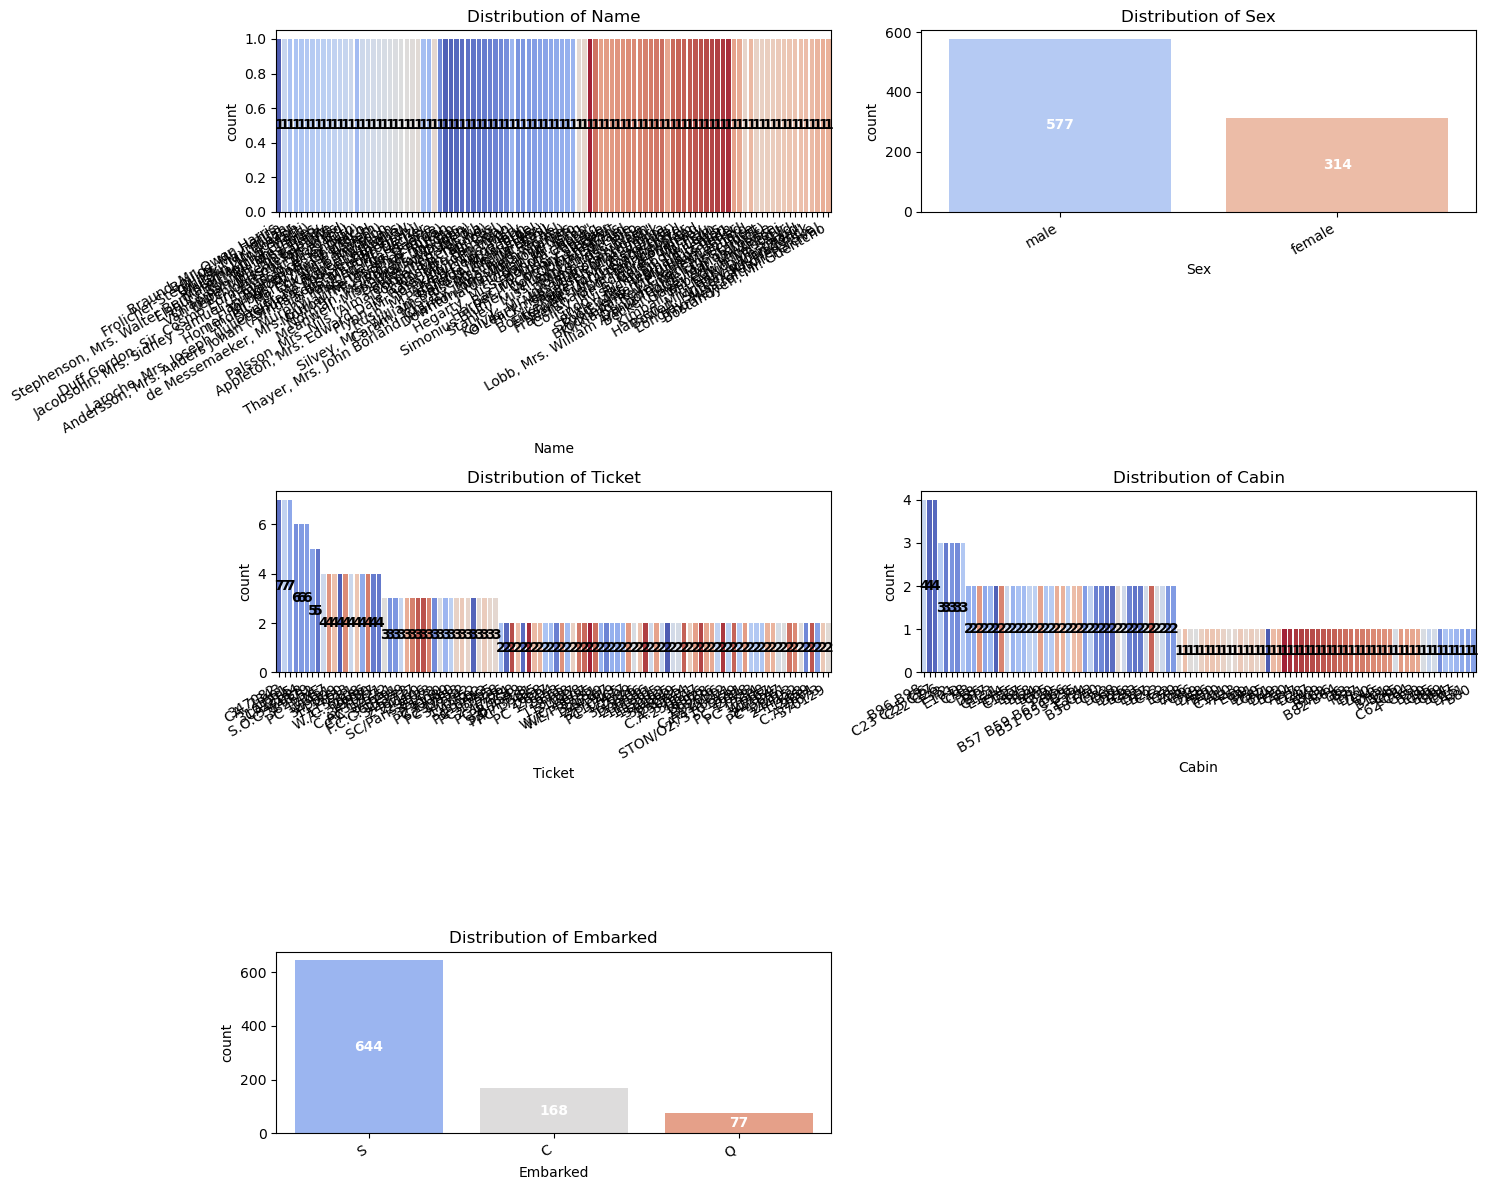

In [32]:
# 📌 Step 4: Categorical Feature Distributions
# Display all in one view
plot_categorical_distributions(df, layout="single", top_n=100)

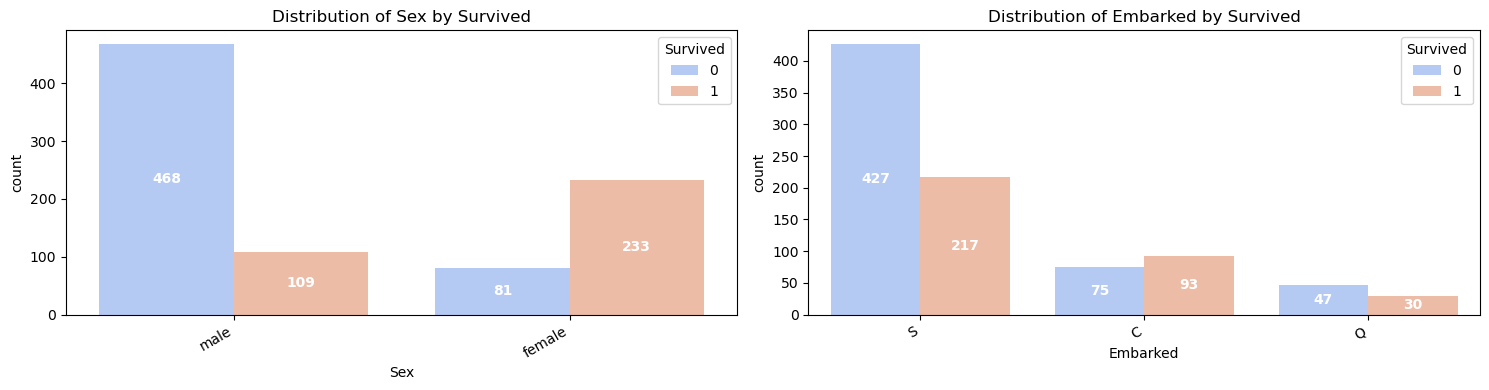

In [33]:
plot_categorical_distributions(df, selected_columns=["Sex", "Embarked"], hue_feature="Survived", layout="single")

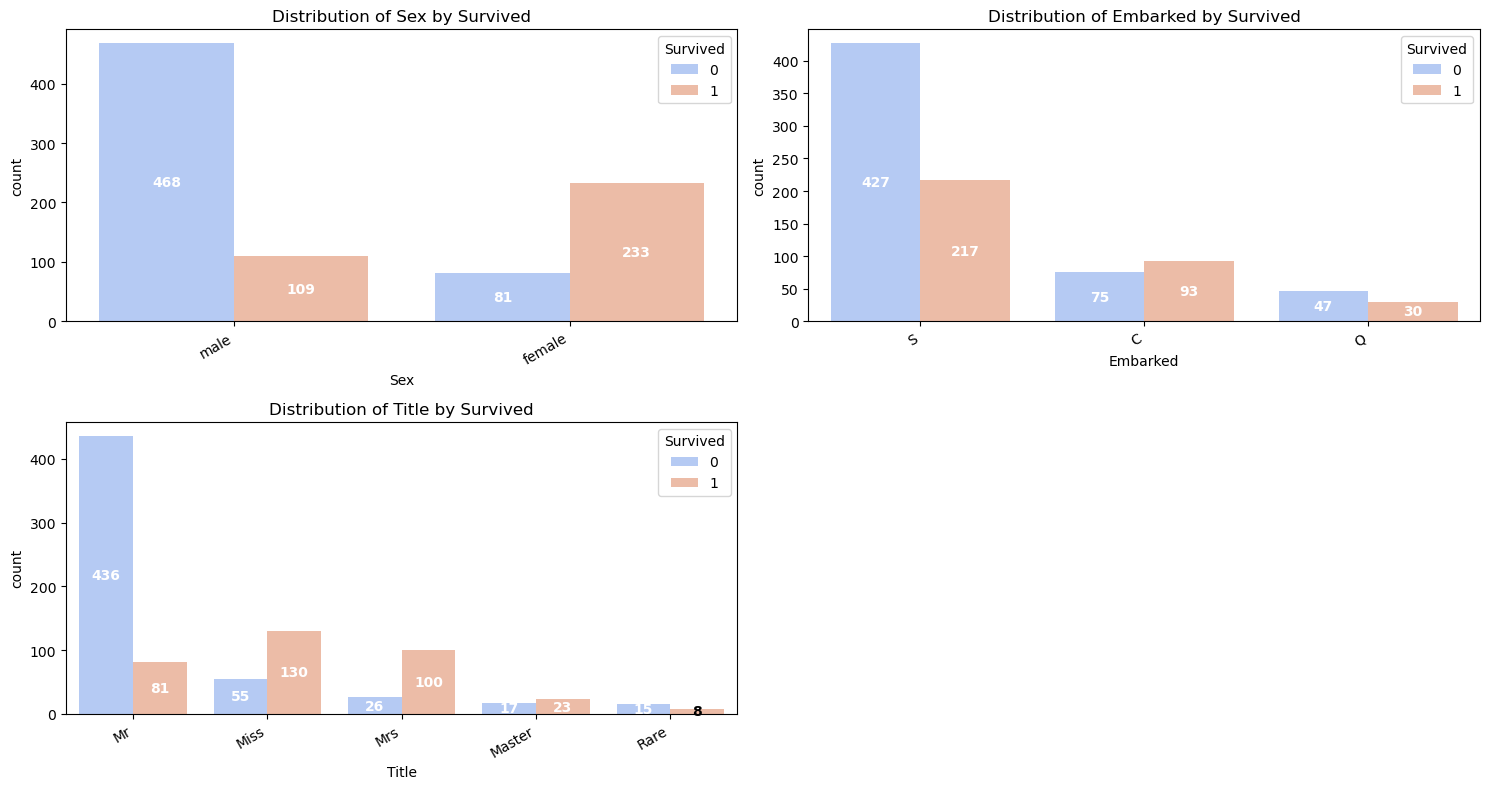

In [35]:
plot_categorical_distributions(df, selected_columns=["Sex", "Embarked", "Title","FamilySize"], hue_feature="Survived", layout="single")

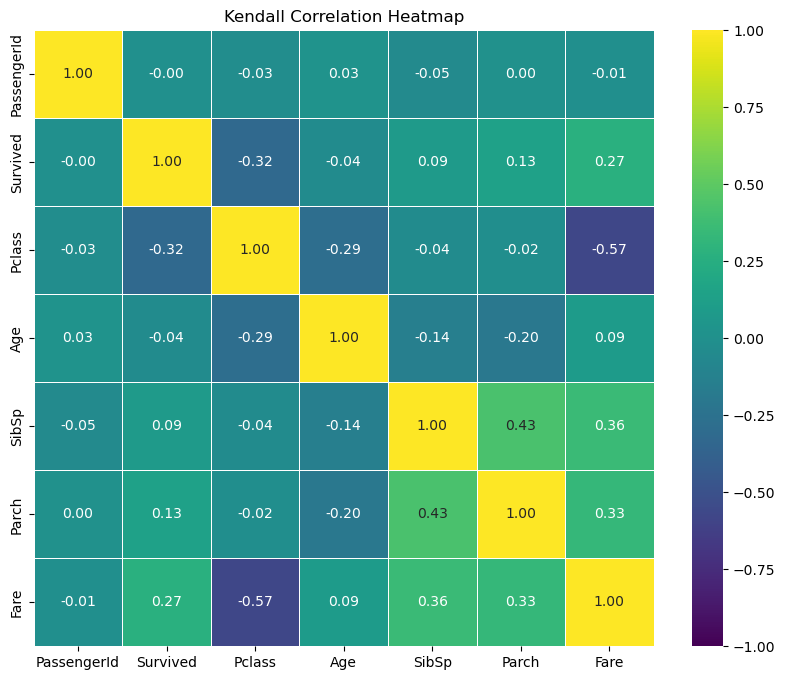

In [72]:
# 📌 Step 7: Correlation Heatmap
# Default Pearson Correlation Heatmap
#plot_correlation_heatmap(df)

# Spearman Correlation Heatmap
#plot_correlation_heatmap(df, method="spearman", figsize=(12, 10), annot=False)

# Kendall Correlation Heatmap with a different colormap
plot_correlation_heatmap(df, method="kendall", cmap="viridis")

In [9]:
corr_df = plot_correlation_heatmap(df, show_dataframe=True)
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


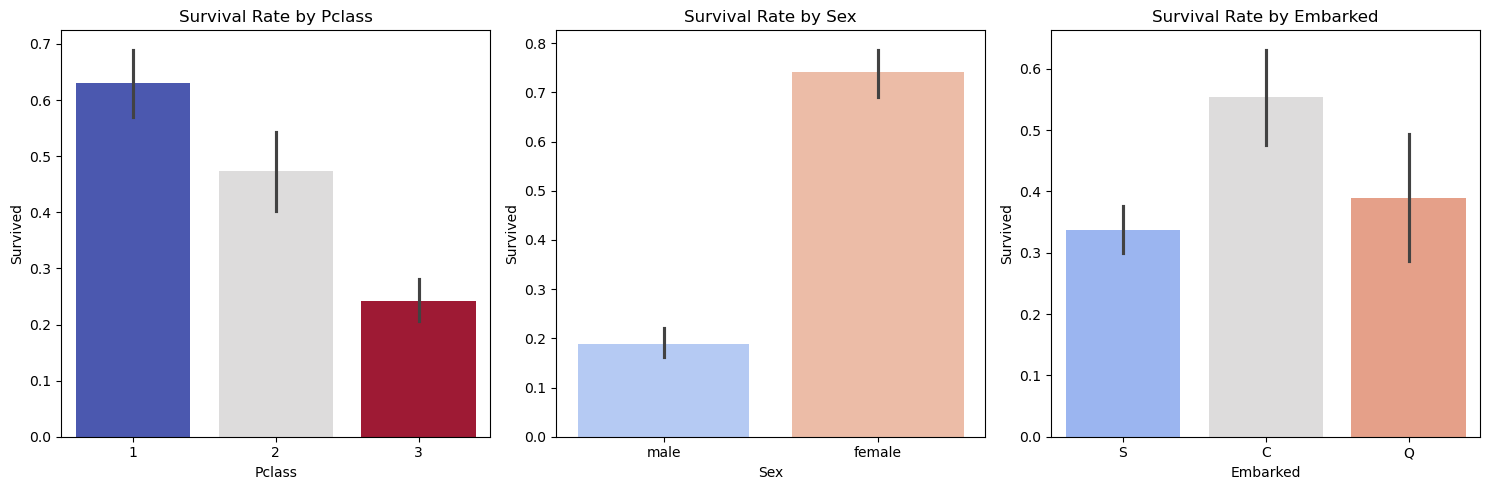

In [74]:
# 📌 Step 8: Survival Analysis by Key Features
features = ["Pclass", "Sex", "Embarked"]

fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

# Ensure axes is always iterable (even if only one feature)
if len(features) == 1:
    axes = [axes]

for i, col in enumerate(features):
    sns.barplot(data=df, x=col, y="Survived", hue=col, legend=False, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Survival Rate by {col}")

plt.tight_layout()
plt.show()


In [78]:
# Reload modules if any change was applied
import importlib

import scripts.feature_engineering  # Ensure the module is recognized
importlib.reload(scripts.feature_engineering)  # Force reload

# Now, import the updated functions

from scripts.feature_engineering import extract_title


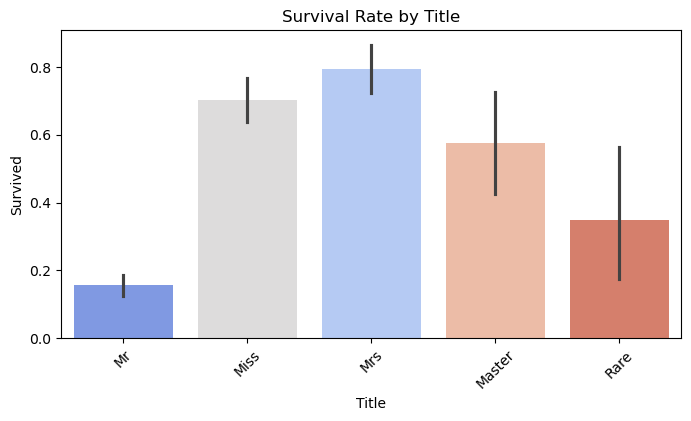

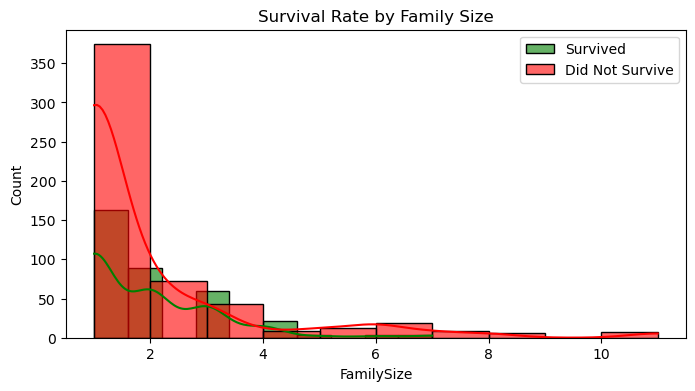

In [79]:
# 📌 Step 9: Feature Engineering (Title Extraction & Family Size)
df = extract_title(df)  # Adds 'Title' column
df = create_family_size(df)  # Adds 'FamilySize' column

# 📌 Step 10: Survival Analysis by Title
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Title", y="Survived", hue="Title", legend=False, 
            palette="coolwarm", order=df["Title"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Survival Rate by Title")
plt.show()

# 📌 Survival Analysis by Family Size
plt.figure(figsize=(8, 4))
sns.histplot(df[df["Survived"] == 1]["FamilySize"], bins=10, kde=True, color="green", label="Survived", alpha=0.6)
sns.histplot(df[df["Survived"] == 0]["FamilySize"], bins=10, kde=True, color="red", label="Did Not Survive", alpha=0.6)
plt.legend()
plt.title("Survival Rate by Family Size")
plt.show()
